In [954]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [955]:
kospi1 = pd.read_csv("./코스피전체연결찐.csv", encoding = "euc-kr")
kospi2 = pd.read_csv("./코스피전체개별찐.csv", encoding = "euc-kr")

In [956]:
kospi1.columns

Index(['회사명', '거래소코드', '회계년도', '종가', 'PER(최고)(IFRS)', 'PER(최저)(IFRS)',
       'PBR(최고)(IFRS)', 'PBR(최저)(IFRS)', 'PCR(최고)(IFRS)', 'PCR(최저)(IFRS)',
       'PSR(최고)(IFRS)', 'PSR(최저)(IFRS)', 'EV/EBITDA(IFRS)', '자기자본순이익률(IFRS연결)',
       '자산(*)(IFRS연결)', '당기순이익(손실)(IFRS연결)', '판매비와 관리비(물류원가 등 포함)(*)(IFRS연결)',
       '연구개발비(IFRS연결)', '매출액(수익)(*)(IFRS연결)', '* (정상)영업손익(보고서기재)(IFRS연결)'],
      dtype='object')

In [957]:
kospi1

,회사명,거래소코드,회계년도,종가,PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS),PSR(최고)(IFRS),PSR(최저)(IFRS),EV/EBITDA(IFRS),자기자본순이익률(IFRS연결),자산(*)(IFRS연결),당기순이익(손실)(IFRS연결),판매비와 관리비(물류원가 등 포함)(*)(IFRS연결),연구개발비(IFRS연결),매출액(수익)(*)(IFRS연결),* (정상)영업손익(보고서기재)(IFRS연결)
0,(주)DB하이텍,990,2015/12,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,1.29,0.28,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,666594987.0,124968815.0
1,(주)DB하이텍,990,2016/12,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,1.21,0.67,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,773140180.0,172427930.0
2,(주)DB하이텍,990,2017/12,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,1.54,0.74,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,679737744.0,143195168.0
3,(주)DB하이텍,990,2018/12,10850.0,9.74,4.68,1.84,0.88,5.07,2.44,1.38,0.67,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,669279136.0,112993143.0
4,(주)DB하이텍,990,2019/12,27600.0,10.60,3.67,2.12,0.73,7.99,2.76,1.59,0.55,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,807416423.0,181292188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,흥아해운(주),3280,2016/12,1330.0,0.00,0.00,1.48,0.62,0.00,0.00,0.34,0.14,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,831746081.0,5895873.0
4287,흥아해운(주),3280,2017/12,751.0,0.00,0.00,2.80,0.85,0.00,0.00,0.38,0.12,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,836427496.0,-13098624.0
4288,흥아해운(주),3280,2018/12,402.0,0.00,0.00,2.97,1.09,0.00,0.00,0.24,0.09,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,753865569.0,-37595967.0
4289,흥아해운(주),3280,2019/12,481.0,0.00,0.00,7.85,1.93,0.00,0.00,1.40,0.35,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,102166838.0,-12364293.0


In [958]:
st15 = pd.read_csv("./코스피주식(2015).csv", encoding = "euc-kr")
st16 = pd.read_csv("./코스피주식(2016).csv", encoding = "euc-kr")
st17 = pd.read_csv("./코스피주식(2017).csv", encoding = "euc-kr")
st18 = pd.read_csv("./코스피주식(2018).csv", encoding = "euc-kr")
st19 = pd.read_csv("./코스피주식(2019).csv", encoding = "euc-kr")
st20 = pd.read_csv("./코스피주식(2020).csv", encoding = "euc-kr")

In [959]:
kospi1.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익']
kospi2.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익']

In [960]:
st15['회계년도'] = '2015/12'
st16['회계년도'] = '2016/12'
st17['회계년도'] = '2017/12'
st18['회계년도'] = '2018/12'
st19['회계년도'] = '2019/12'
st20['회계년도'] = '2020/12'


In [961]:
df = pd.concat([st15, st16, st17, st18, st19, st20], axis=0)

In [962]:
df

,종목코드,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,회계년도
0,095570,AJ네트웍스,47100,550,1.18,47900,47900,46150,5703,267087200,441066018900,9364459,2015/12
1,068400,AJ렌터카,11900,0,0.00,12000,12000,11550,80410,944512000,263540970000,22146300,2015/12
2,006840,AK홀딩스,63200,1200,1.94,62100,63400,61900,41294,2597276200,837245855200,13247561,2015/12
3,027410,BGF리테일,171500,7500,4.57,164500,173500,164500,57340,9813907000,4248734826000,24773964,2015/12
4,138930,BNK금융지주,8420,50,0.60,8380,8430,8320,1398463,11715942890,2154974771320,255935246,2015/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,069260,휴켐스,25650,850,3.43,24850,25850,24550,432572,10963080100,1048535782200,40878588,2020/12
913,000540,흥국화재,2830,55,1.98,2835,2835,2755,33270,93301690,181806685350,64242645,2020/12
914,000547,흥국화재2우B,19500,-50,-0.26,19150,20000,19150,372,7250800,2995200000,153600,2020/12
915,000545,흥국화재우,7450,-250,-3.25,7410,7950,7360,34029,259551960,5721600000,768000,2020/12


In [963]:
kospi = kospi1.fillna(kospi2)

In [964]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,매출액,영업이익
0,(주)DB하이텍,990,2015/12,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,1.29,0.28,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,666594987.0,124968815.0
1,(주)DB하이텍,990,2016/12,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,1.21,0.67,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,773140180.0,172427930.0
2,(주)DB하이텍,990,2017/12,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,1.54,0.74,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,679737744.0,143195168.0
3,(주)DB하이텍,990,2018/12,10850.0,9.74,4.68,1.84,0.88,5.07,2.44,1.38,0.67,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,669279136.0,112993143.0
4,(주)DB하이텍,990,2019/12,27600.0,10.60,3.67,2.12,0.73,7.99,2.76,1.59,0.55,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,807416423.0,181292188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,흥아해운(주),3280,2016/12,1330.0,0.00,0.00,1.48,0.62,0.00,0.00,0.34,0.14,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,831746081.0,5895873.0
4287,흥아해운(주),3280,2017/12,751.0,0.00,0.00,2.80,0.85,0.00,0.00,0.38,0.12,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,836427496.0,-13098624.0
4288,흥아해운(주),3280,2018/12,402.0,0.00,0.00,2.97,1.09,0.00,0.00,0.24,0.09,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,753865569.0,-37595967.0
4289,흥아해운(주),3280,2019/12,481.0,0.00,0.00,7.85,1.93,0.00,0.00,1.40,0.35,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,102166838.0,-12364293.0


In [965]:
kospi['종목코드'] = kospi['종목코드'].astype(str).str.zfill(6)

In [966]:
kospi['회사명'] = kospi['회사명'].str.replace('(주)', '')

In [967]:
kospi = pd.merge(kospi, df[['종목코드', '회계년도', '상장주식수', '시가총액']], on=['종목코드', '회계년도'], how='left')

In [968]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),...,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,매출액,영업이익,상장주식수,시가총액
0,DB하이텍,000990,2015/12,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,...,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,666594987.0,124968815.0,44367832.0,6.344600e+11
1,DB하이텍,000990,2016/12,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,...,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,773140180.0,172427930.0,44367832.0,7.054485e+11
2,DB하이텍,000990,2017/12,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,...,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,679737744.0,143195168.0,44367832.0,5.324140e+11
3,DB하이텍,000990,2018/12,10850.0,9.74,4.68,1.84,0.88,5.07,2.44,...,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,669279136.0,112993143.0,44398588.0,4.817247e+11
4,DB하이텍,000990,2019/12,27600.0,10.60,3.67,2.12,0.73,7.99,2.76,...,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,807416423.0,181292188.0,44398588.0,1.225401e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,흥아해운,003280,2016/12,1330.0,0.00,0.00,1.48,0.62,0.00,0.00,...,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,831746081.0,5895873.0,102713430.0,1.366089e+11
4287,흥아해운,003280,2017/12,751.0,0.00,0.00,2.80,0.85,0.00,0.00,...,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,836427496.0,-13098624.0,127713430.0,9.591279e+10
4288,흥아해운,003280,2018/12,402.0,0.00,0.00,2.97,1.09,0.00,0.00,...,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,753865569.0,-37595967.0,175643430.0,7.060866e+10
4289,흥아해운,003280,2019/12,481.0,0.00,0.00,7.85,1.93,0.00,0.00,...,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,102166838.0,-12364293.0,112112392.0,5.392606e+10


In [969]:
# 컬럼 값의 뒤에서 "/12"를 제거하는 함수
def remove_suffix(value):
    if isinstance(value, str) and value.endswith("/12"):
        return value[:-3]  # 마지막 세 글자 제거
    else:
        return value

# 모든 컬럼에 함수 적용
kospi = kospi.applymap(remove_suffix)

In [970]:
kospi = kospi.dropna()

In [971]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),...,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,매출액,영업이익,상장주식수,시가총액
0,DB하이텍,000990,2015,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,...,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,666594987.0,124968815.0,44367832.0,6.344600e+11
1,DB하이텍,000990,2016,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,...,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,773140180.0,172427930.0,44367832.0,7.054485e+11
2,DB하이텍,000990,2017,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,...,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,679737744.0,143195168.0,44367832.0,5.324140e+11
3,DB하이텍,000990,2018,10850.0,9.74,4.68,1.84,0.88,5.07,2.44,...,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,669279136.0,112993143.0,44398588.0,4.817247e+11
4,DB하이텍,000990,2019,27600.0,10.60,3.67,2.12,0.73,7.99,2.76,...,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,807416423.0,181292188.0,44398588.0,1.225401e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,흥아해운,003280,2016,1330.0,0.00,0.00,1.48,0.62,0.00,0.00,...,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,831746081.0,5895873.0,102713430.0,1.366089e+11
4287,흥아해운,003280,2017,751.0,0.00,0.00,2.80,0.85,0.00,0.00,...,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,836427496.0,-13098624.0,127713430.0,9.591279e+10
4288,흥아해운,003280,2018,402.0,0.00,0.00,2.97,1.09,0.00,0.00,...,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,753865569.0,-37595967.0,175643430.0,7.060866e+10
4289,흥아해운,003280,2019,481.0,0.00,0.00,7.85,1.93,0.00,0.00,...,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,102166838.0,-12364293.0,112112392.0,5.392606e+10


In [972]:
kospi["PER"] = (kospi["PER(최고)"] + kospi["PER(최저)"])/2
kospi["PBR"] = (kospi["PBR(최고)"] + kospi["PBR(최저)"])/2
kospi["PCR"] = (kospi["PCR(최고)"] + kospi["PCR(최저)"])/2
kospi["PSR"] = (kospi["PSR(최고)"] + kospi["PSR(최저)"])/2
kospi['PRR'] = kospi["시가총액"]/ kospi["연구개발비"]
kospi['RDS'] = kospi["연구개발비"]/ kospi["매출액"]
kospi['RDO'] = kospi["연구개발비"]/ kospi["영업이익"]
kospi['RDN'] = kospi["연구개발비"]/ kospi["당기순이익"]
kospi.drop(["PER(최고)", "PER(최저)", "PBR(최고)", "PBR(최저)", "PCR(최고)", "PCR(최저)", "PSR(최고)", "PSR(최저)"], axis=1, inplace=True)

In [973]:
kospi.reset_index(drop=True, inplace=True)

In [974]:
kospi["ROA"] = kospi["당기순이익"]/kospi["자산"]*100
kospi["판관비"] = kospi["판매관리비"]/kospi["시가총액"]*1000
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비
0,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,...,4.105,2.150,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039
1,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,...,8.260,2.145,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677
2,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,10.395,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305
3,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,7.210,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452
4,DB하이텍,000990,2019,27600.0,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,...,7.135,1.425,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,흥아해운,003280,2016,1330.0,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,...,0.000,1.050,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440
4024,흥아해운,003280,2017,751.0,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,...,0.000,1.825,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706
4025,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,0.000,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291
4026,흥아해운,003280,2019,481.0,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,...,0.000,4.890,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287


In [975]:
kospi["EY"] = 1/kospi["이익수익률"]
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY
0,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,...,2.150,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695
1,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,...,2.145,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305
2,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542
3,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097
4,DB하이텍,000990,2019,27600.0,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,...,1.425,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,흥아해운,003280,2016,1330.0,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,...,1.050,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440,0.066445
4024,흥아해운,003280,2017,751.0,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,...,1.825,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706,0.024178
4025,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf
4026,흥아해운,003280,2019,481.0,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,...,4.890,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287,0.017156


In [976]:
# kospi.to_csv('./kospi(0530).csv', index=False)

In [977]:
# kospi.loc[kospi["회계년도"] == "2013/12"].sort_values(by = ["PER"], ascending=False)

In [978]:
# pbr_jan2013 = kospi.loc[kospi["회계년도"] == "2013/12"][kospi["거래월"] == 1.0].sort_values(by = ["pbr"], ascending=False)

In [979]:
kospi['회계년도'] = kospi['회계년도'].astype(int)

In [980]:
adjust_price = pd.read_csv("./adjust_price.csv")

In [981]:
adjust_price

,Unnamed: 0,날짜,종목,종목코드,종가,수익률
0,0,2013-04-01,DB하이텍,990,6440.0,NaN
1,1,2014-04-01,DB하이텍,990,6640.0,0.310559
2,2,2015-04-01,DB하이텍,990,5880.0,-1.144578
3,3,2016-04-01,DB하이텍,990,18100.0,20.782313
4,4,2017-04-03,DB하이텍,990,20350.0,1.243094
...,...,...,...,...,...,...
1543,1543,2022-04-01,효성첨단소재,298050,522000.0,4.051144
1544,1544,2019-04-01,효성티앤씨,298020,179000.0,NaN
1545,1545,2020-04-01,효성티앤씨,298020,104000.0,-4.189944
1546,1546,2021-04-01,효성티앤씨,298020,558000.0,43.653846


In [982]:
# 날짜를 년도로 변환
adjust_price['날짜'] = pd.to_datetime(adjust_price['날짜'])
adjust_price['년도'] = adjust_price['날짜'].dt.year
adjust_price = adjust_price[['년도', '종목', '종가', '수익률']]
adjust_price

,년도,종목,종가,수익률
0,2013,DB하이텍,6440.0,NaN
1,2014,DB하이텍,6640.0,0.310559
2,2015,DB하이텍,5880.0,-1.144578
3,2016,DB하이텍,18100.0,20.782313
4,2017,DB하이텍,20350.0,1.243094
...,...,...,...,...
1543,2022,효성첨단소재,522000.0,4.051144
1544,2019,효성티앤씨,179000.0,NaN
1545,2020,효성티앤씨,104000.0,-4.189944
1546,2021,효성티앤씨,558000.0,43.653846


In [983]:
kospi = pd.merge(kospi, adjust_price[['년도', '종목', '종가']], left_on=['회계년도', '회사명'], right_on=['년도', '종목'], how='left')
kospi.drop(['년도', '종목'], axis=1, inplace=True)
kospi

,회사명,종목코드,회계년도,종가_x,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,종가_y
0,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,...,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695,5880.0
1,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,...,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305,18100.0
2,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542,20350.0
3,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0
4,DB하이텍,000990,2019,27600.0,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,...,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,흥아해운,003280,2016,1330.0,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,...,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440,0.066445,NaN
4024,흥아해운,003280,2017,751.0,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,...,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706,0.024178,NaN
4025,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf,NaN
4026,흥아해운,003280,2019,481.0,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,...,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287,0.017156,NaN


In [984]:
kospi.columns

Index(['회사명', '종목코드', '회계년도', '종가_x', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비',
       '연구개발비', '매출액', '영업이익', '상장주식수', '시가총액', 'PER', 'PBR', 'PCR', 'PSR',
       'PRR', 'RDS', 'RDO', 'RDN', 'ROA', '판관비', 'EY', '종가_y'],
      dtype='object')

In [985]:
kospi.columns = ['회사명', '종목코드', '회계년도', '종가', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익', '상장주식수', '시가총액', 'PER', 'PBR', 'PCR', 'PSR', 'PRR', 'RDS', 'RDO', 'RDN', 'ROA', '판관비', 'EY', '수정종가']

In [986]:
kospi.drop(["이익수익률", "자산", "판매관리비", "당기순이익", '연구개발비', '매출액', '영업이익', '상장주식수'], axis=1, inplace=True)

In [987]:
kospi['수익률'] = kospi.groupby('회사명')['수정종가'].pct_change() * 10

In [988]:
kospi = kospi.dropna()

In [989]:
kospi = kospi.reset_index(drop=True)

In [990]:
# kospi.to_csv('./kospi(최종).csv', index=False)

In [991]:
# kospi = pd.read_csv("./kospi(최종).csv")

In [992]:
kospi = kospi.replace([np.inf, -np.inf], 0)

In [993]:
kospi = kospi.loc[~(kospi["PER"] == 0)]

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

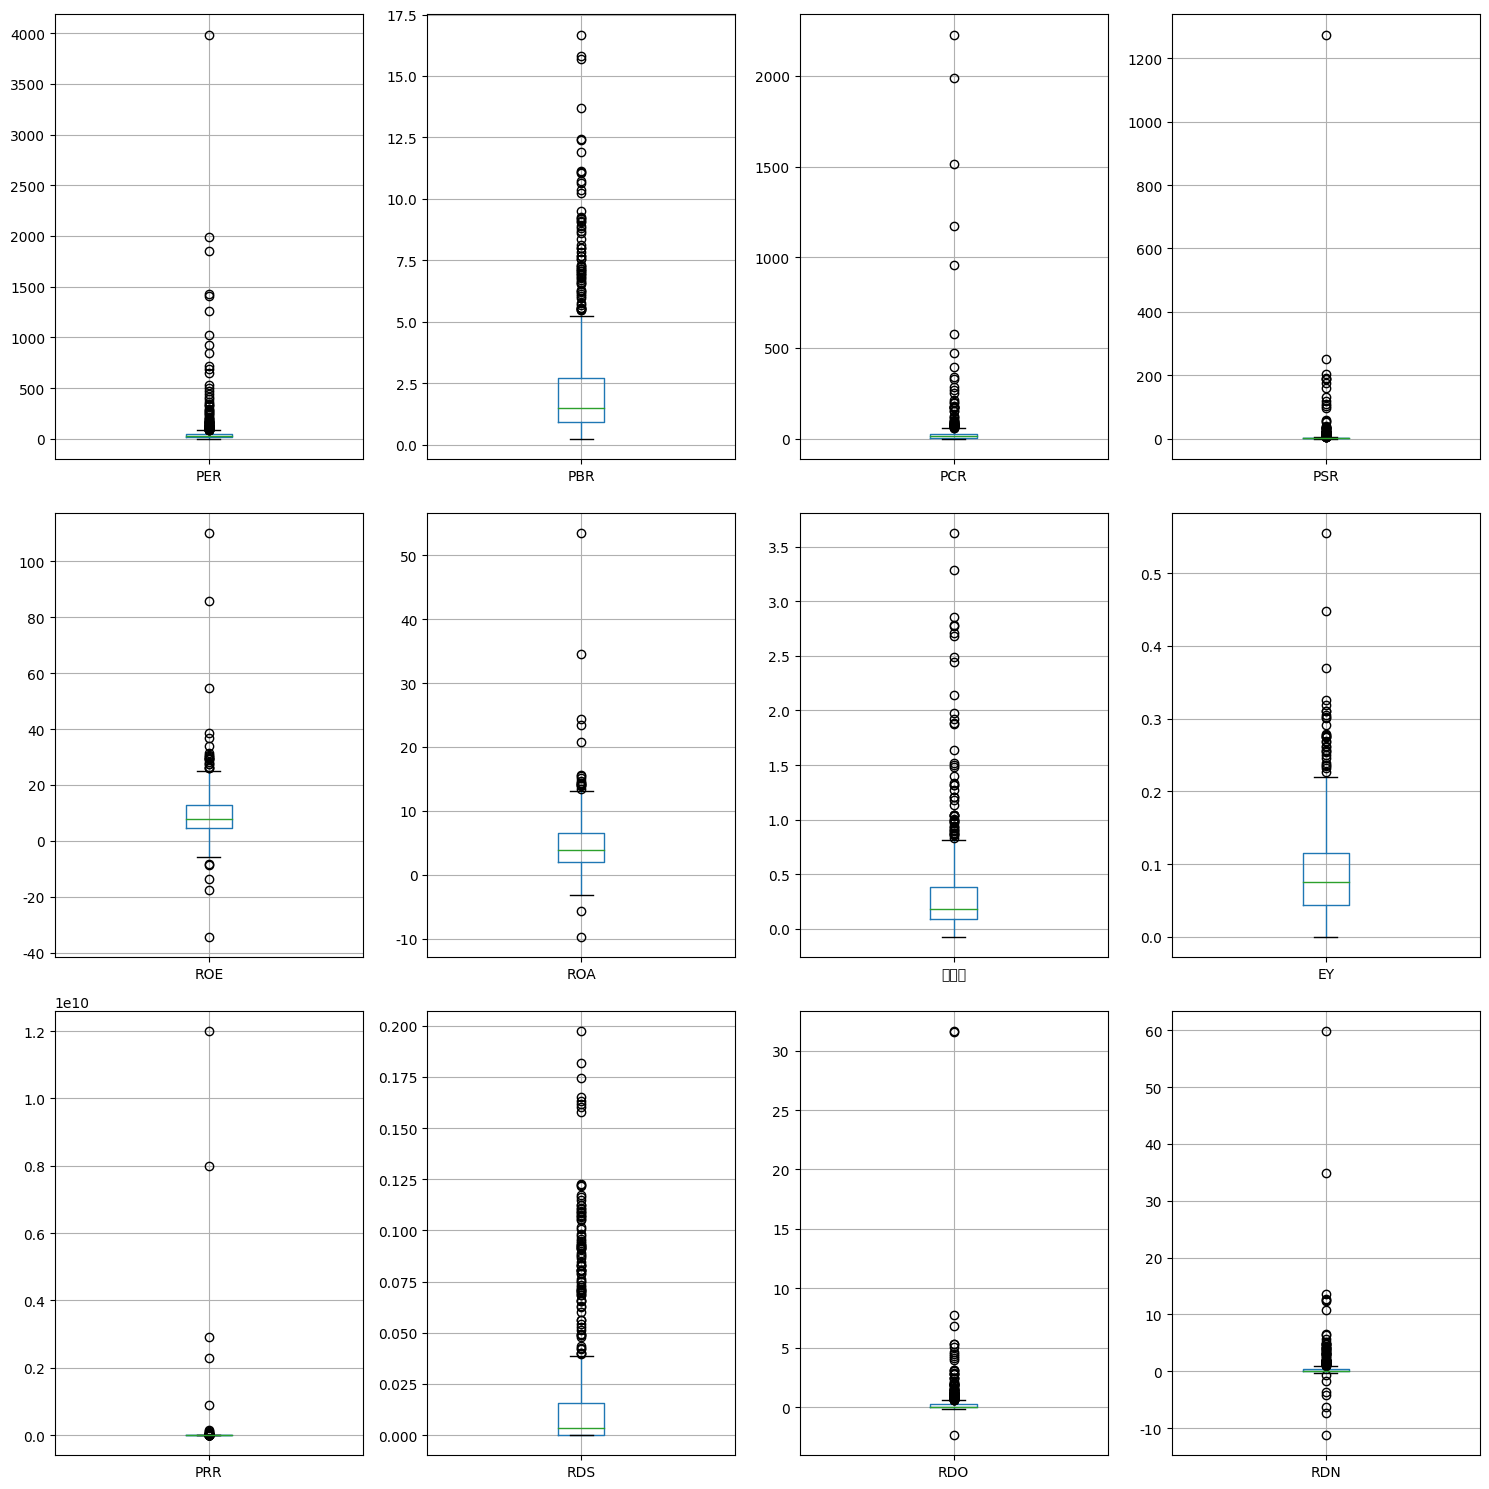

In [994]:
## 윈저라이징 전 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']]
kospi_num_col = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY",'PRR', 'RDS', 'RDO', 'RDN']].columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

In [995]:
kospi_f = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']]

In [996]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN
0,8.260,2.145,2.945,0.940,29.65,8.952679,0.166677,0.246305,13127.554595,0.069506,0.311655,0.608281
1,10.395,1.910,4.245,1.140,27.62,11.084563,0.207305,0.269542,9781.986918,0.080072,0.380097,0.494014
2,7.210,1.360,3.755,1.025,17.12,8.141211,0.212452,0.268097,9121.845859,0.078906,0.467373,0.608209
3,7.135,1.425,5.375,1.070,17.40,9.609513,0.092077,0.186567,22160.753559,0.068485,0.305010,0.528455
4,8.975,1.960,4.790,1.590,23.07,14.086903,0.052797,0.145985,38699.184564,0.062517,0.244473,0.352422
...,...,...,...,...,...,...,...,...,...,...,...,...
736,10.685,0.480,3.815,0.460,4.37,2.179972,0.136181,0.151976,0.000000,0.000000,0.000000,0.000000
737,20.385,0.470,5.485,0.410,2.39,1.224923,0.173226,0.157480,0.000000,0.000000,0.000000,0.000000
738,169.025,0.335,7.625,0.305,0.10,0.074530,0.254031,0.123001,0.000000,0.000000,0.000000,0.000000
740,10.285,1.230,3.890,0.675,0.02,0.286557,0.261343,0.032404,23902.676961,0.011662,0.816356,4.100598


In [997]:
# 윈저라이징으로 양쪽 이상치 처리
# 이상치 확인
kospi_f['PER']

q2 = np.percentile(kospi_f['PER'], 2)
q98 = np.percentile(kospi_f['PER'], 98)

outliers = kospi_f['PER'][(kospi_f['PER'] < q2) | (kospi_f['PER'] > q98)]

print("하위 2%:", q2)
print("상위 2%:", q98)
print("이상치 :", outliers)

하위 2%: 4.1895
상위 2%: 518.0855000000001
이상치 : 37     1406.015
39      645.450
41        3.255
53        3.470
67        3.900
103       2.405
183       2.315
262    1847.540
265       0.695
343       2.770
344       2.970
365     720.000
372     849.515
469    3986.830
471       3.780
502       4.180
534       3.685
544       2.140
603       1.835
659    1025.100
660    1992.565
661     927.920
662     686.050
664    1429.075
668    1262.105
681     528.260
Name: PER, dtype: float64


In [998]:
# 윈저라이징 함수 만들기
def windsorize(data, lower_percentile=0.02, upper_percentile=0.98):
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    numeric_df = data.select_dtypes(include=np.number)
    lower_bound = np.percentile(numeric_df, lower_percentile * 100)
    upper_bound = np.percentile(numeric_df, upper_percentile * 100)
    windsorized_data = np.where(numeric_df < lower_bound, lower_bound, numeric_df)
    windsorized_data = np.where(windsorized_data > upper_bound, upper_bound, windsorized_data)
    return windsorized_data

In [999]:
for i in range(0, 7, 1):
    kospi_f[kospi_f.columns[i]] = windsorize(kospi_f[kospi_f.columns[i]])

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_1180/3556095379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_f[kospi_f.columns[i]] = windsorize(kospi_f[kospi_f.columns[i]])


In [1000]:
# 윈저라이징으로 양쪽 이상치 처리
# 이상치 처리 확인 후 확인
kospi_f['PER']

q2 = np.percentile(kospi_f['PER'], 2)
q98 = np.percentile(kospi_f['PER'], 98)

outliers = kospi_f['PER'][(kospi_f['PER'] < q2) | (kospi_f['PER'] > q98)]

print("하위 2%:", q2)
print("상위 2%:", q98)
print("이상치 :", outliers)

하위 2%: 4.19539
상위 2%: 511.77731000000017
이상치 : 37     518.0855
39     518.0855
41       4.1895
53       4.1895
67       4.1895
103      4.1895
183      4.1895
262    518.0855
265      4.1895
343      4.1895
344      4.1895
365    518.0855
372    518.0855
469    518.0855
471      4.1895
502      4.1895
534      4.1895
544      4.1895
603      4.1895
659    518.0855
660    518.0855
661    518.0855
662    518.0855
664    518.0855
668    518.0855
681    518.0855
Name: PER, dtype: float64


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

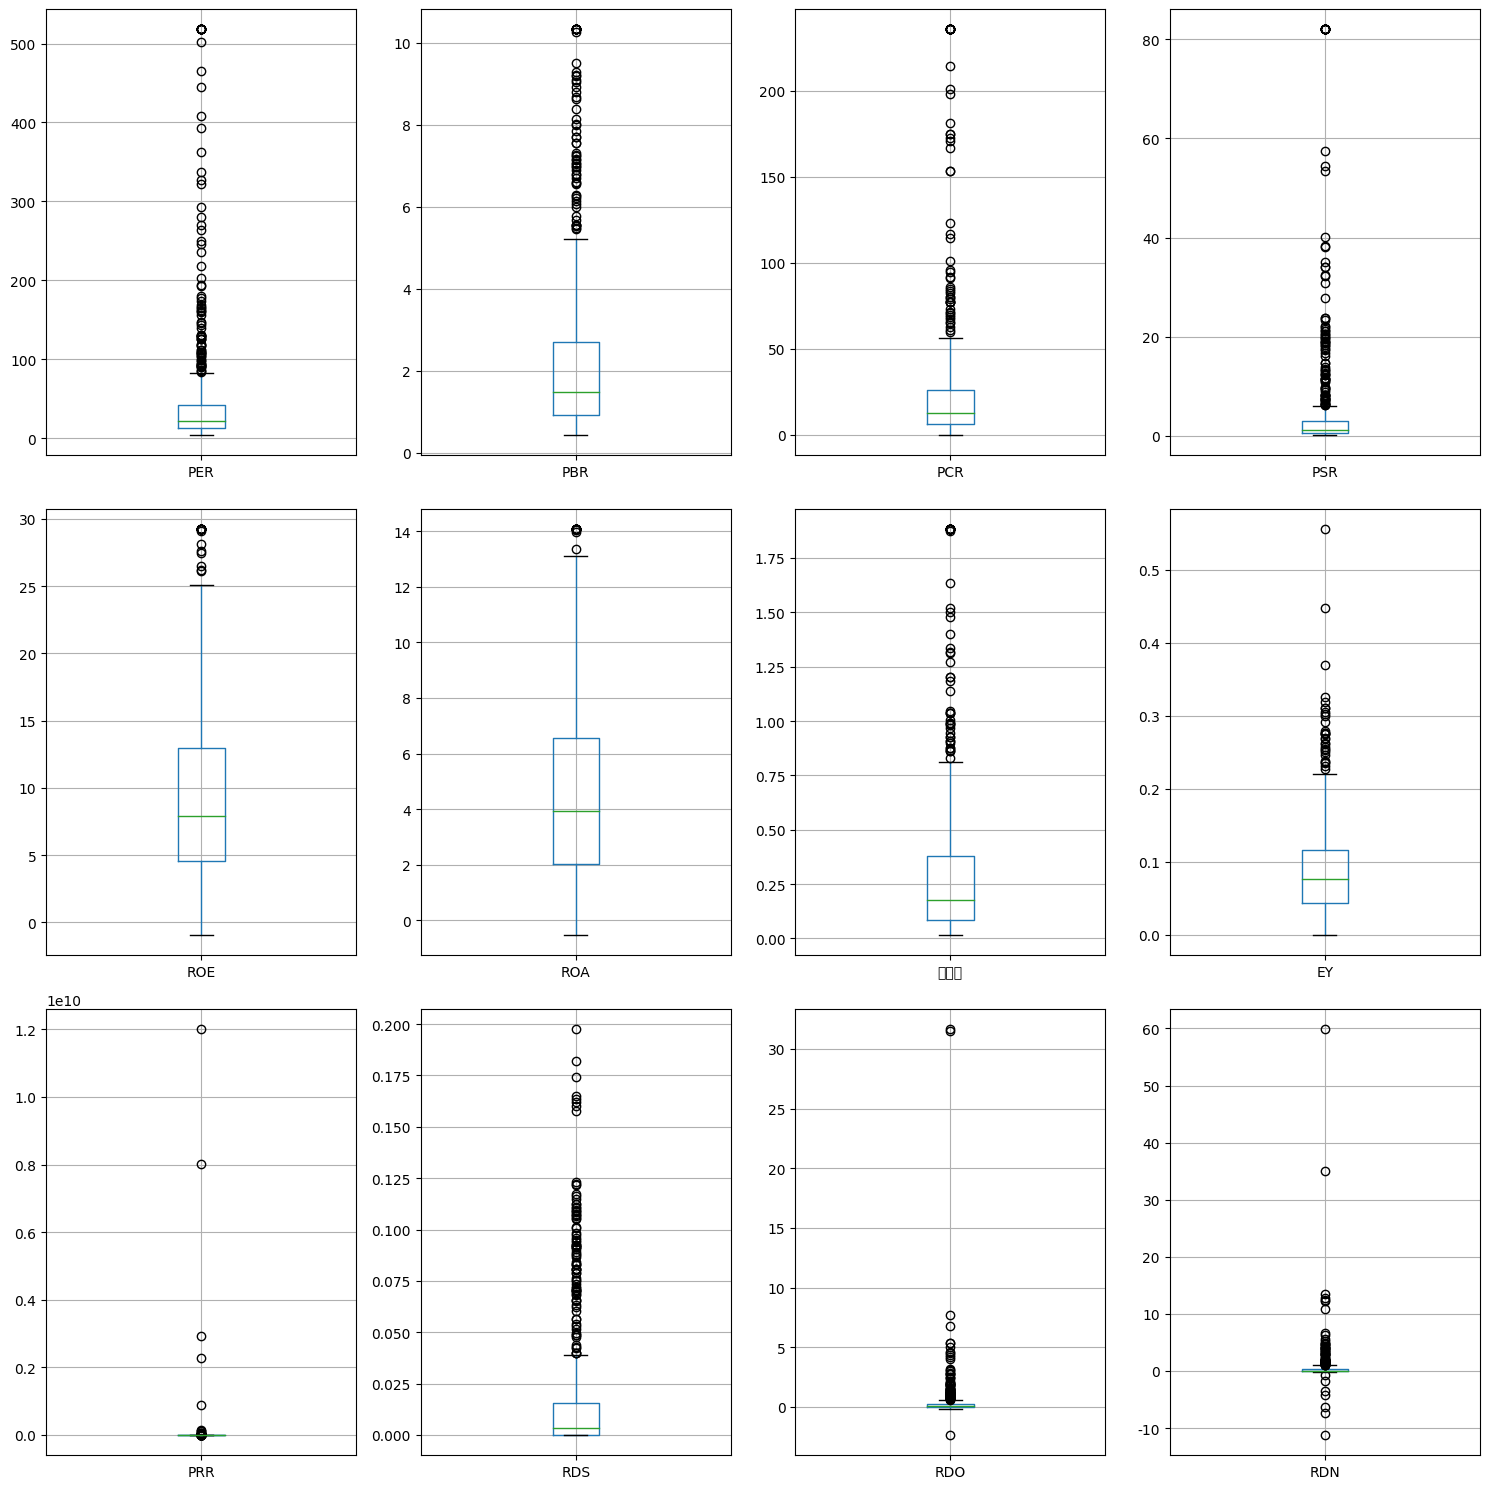

In [1001]:
## 윈저라이징 후 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi_f
kospi_num_col = kospi_f.columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

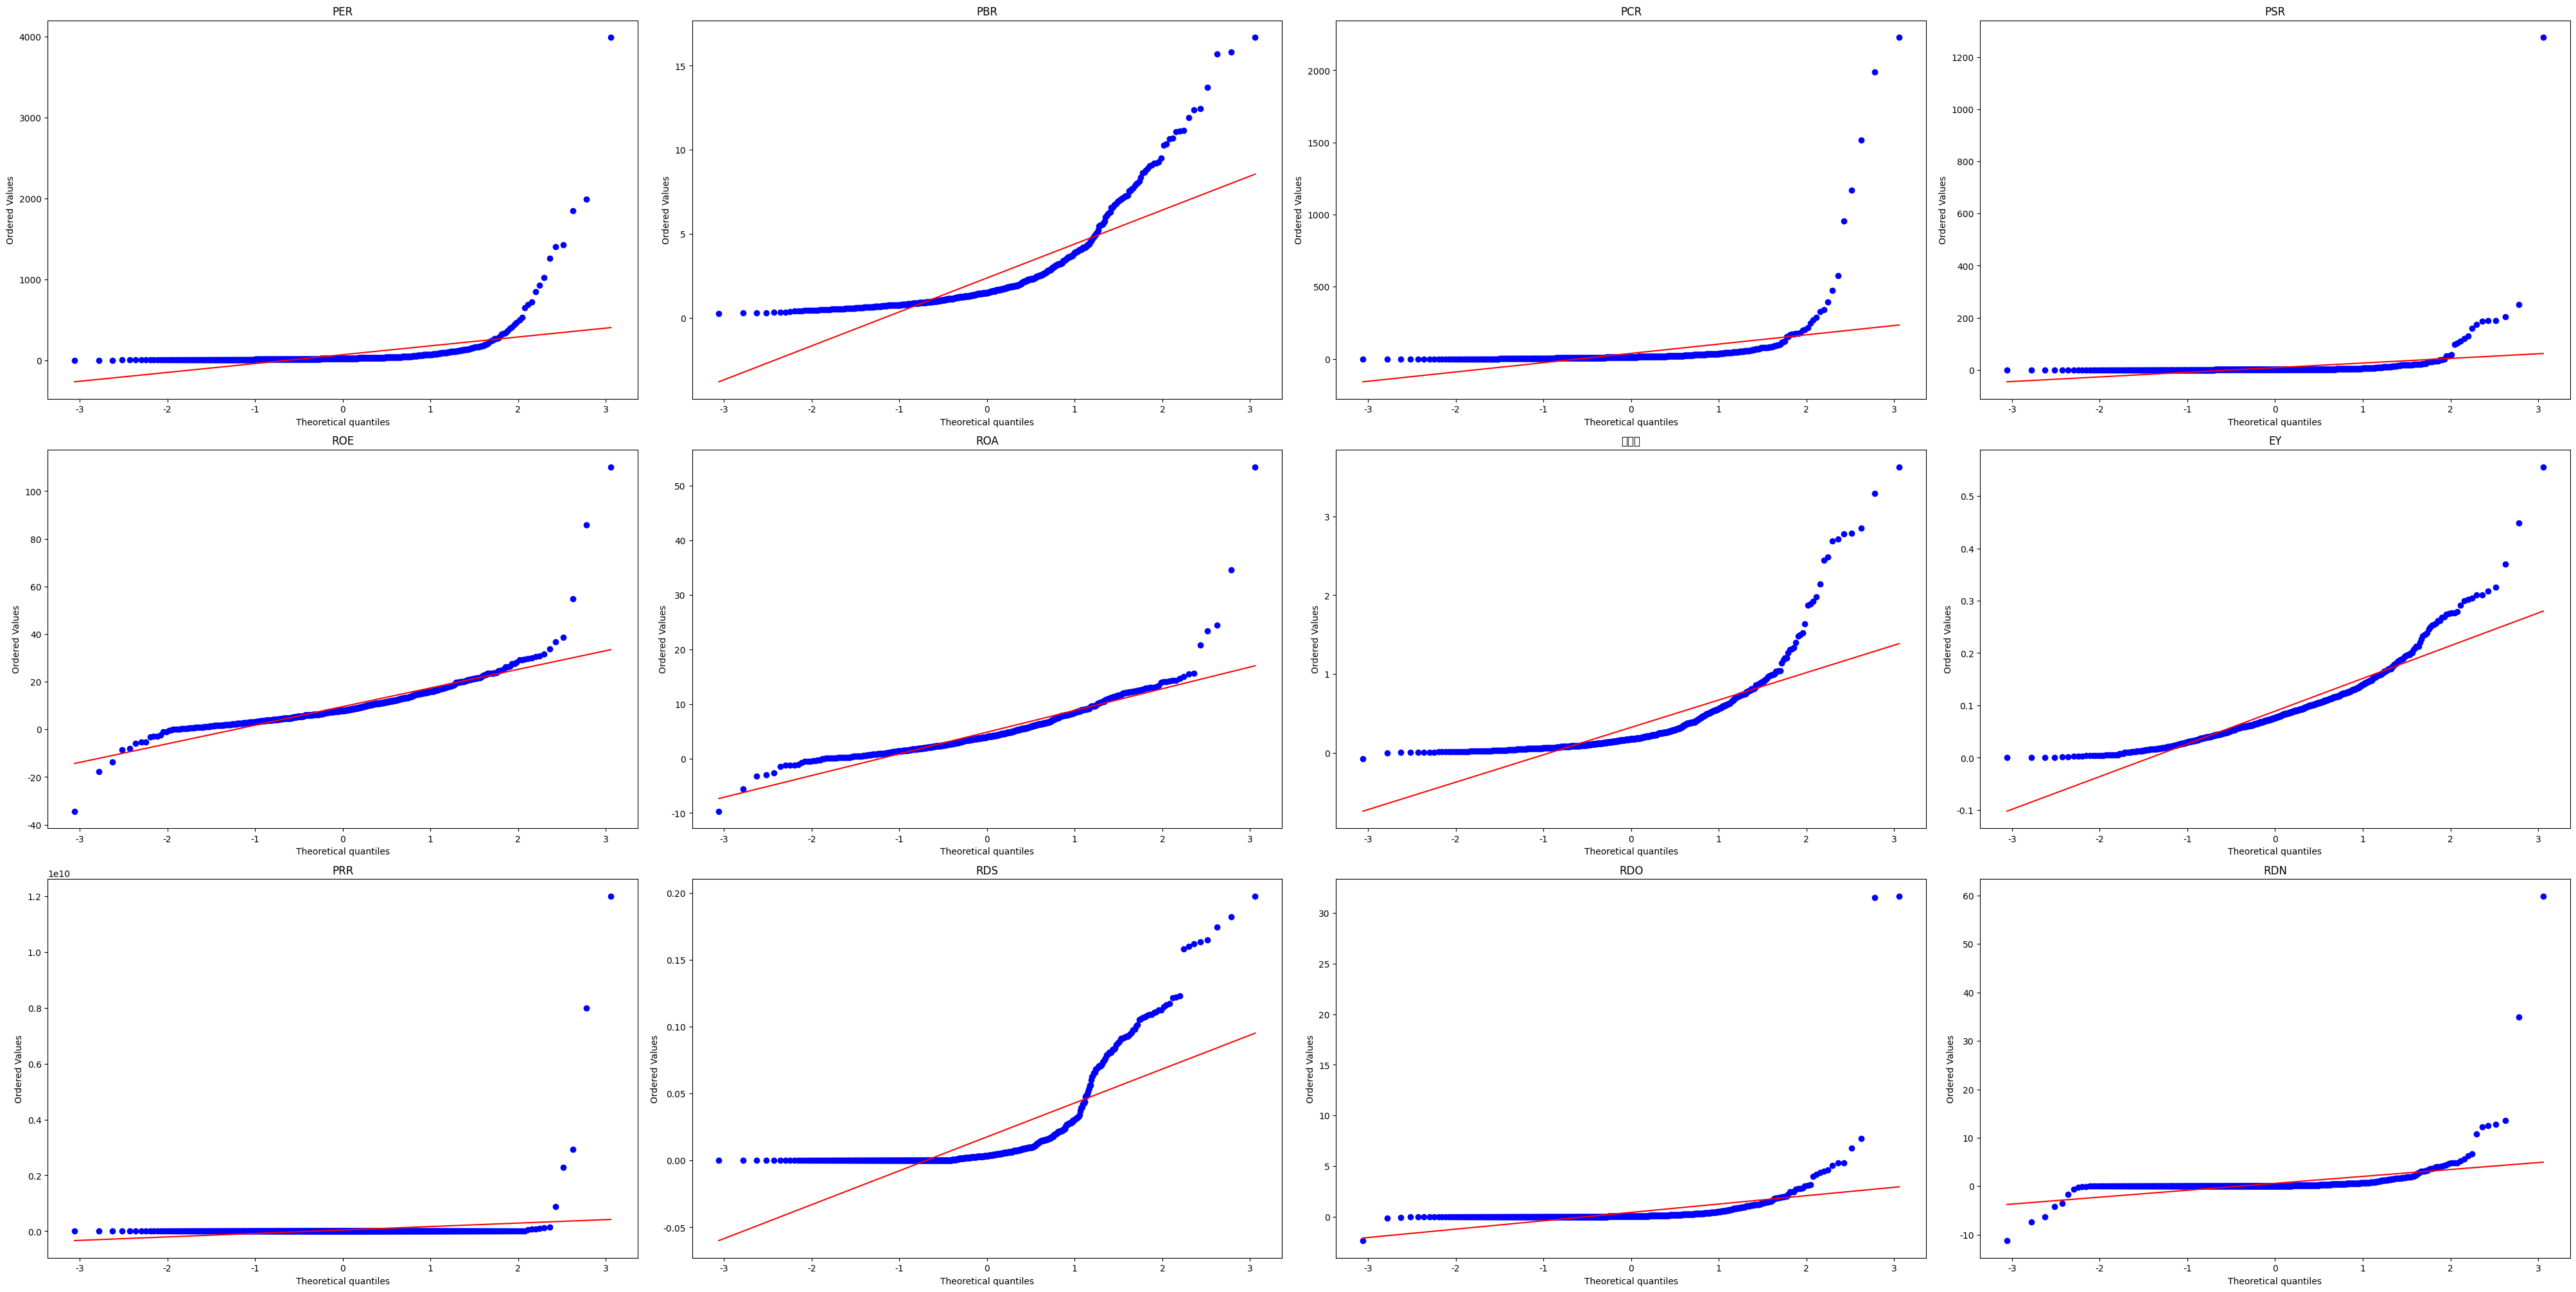

In [1002]:
# 윈저라이징 전 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']],4,3)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

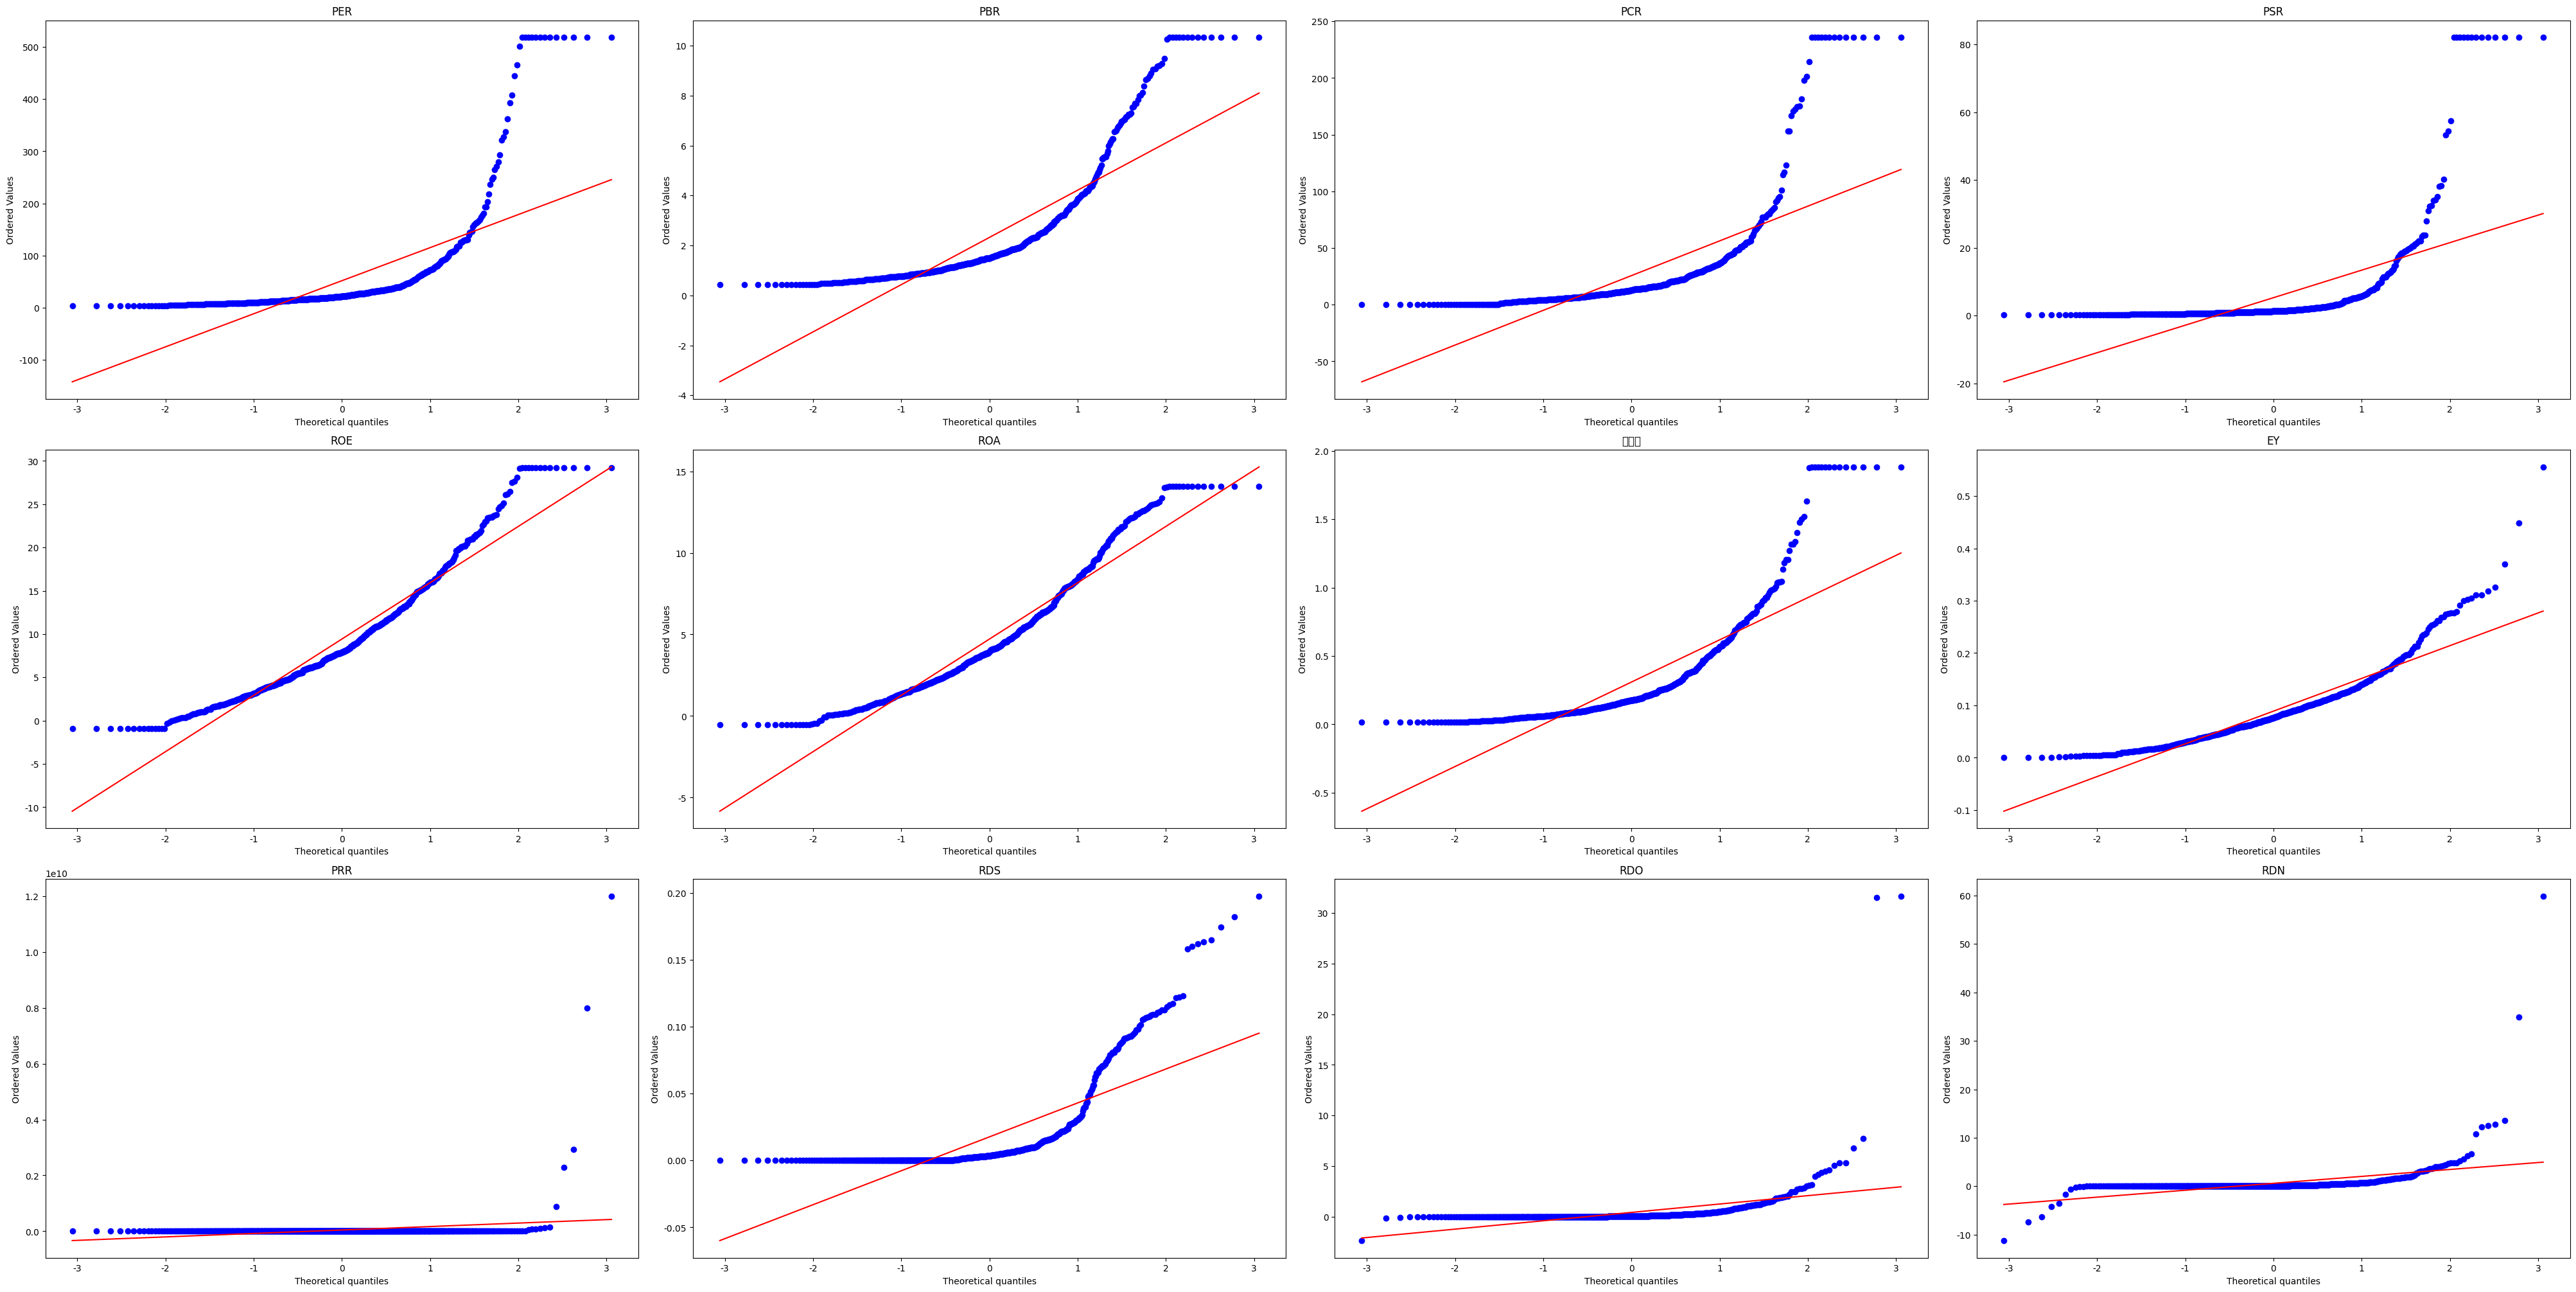

In [1003]:
# 윈저라이징 후 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi_f, 4, 3)

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_1180/161394956.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_1180/161394956.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new func

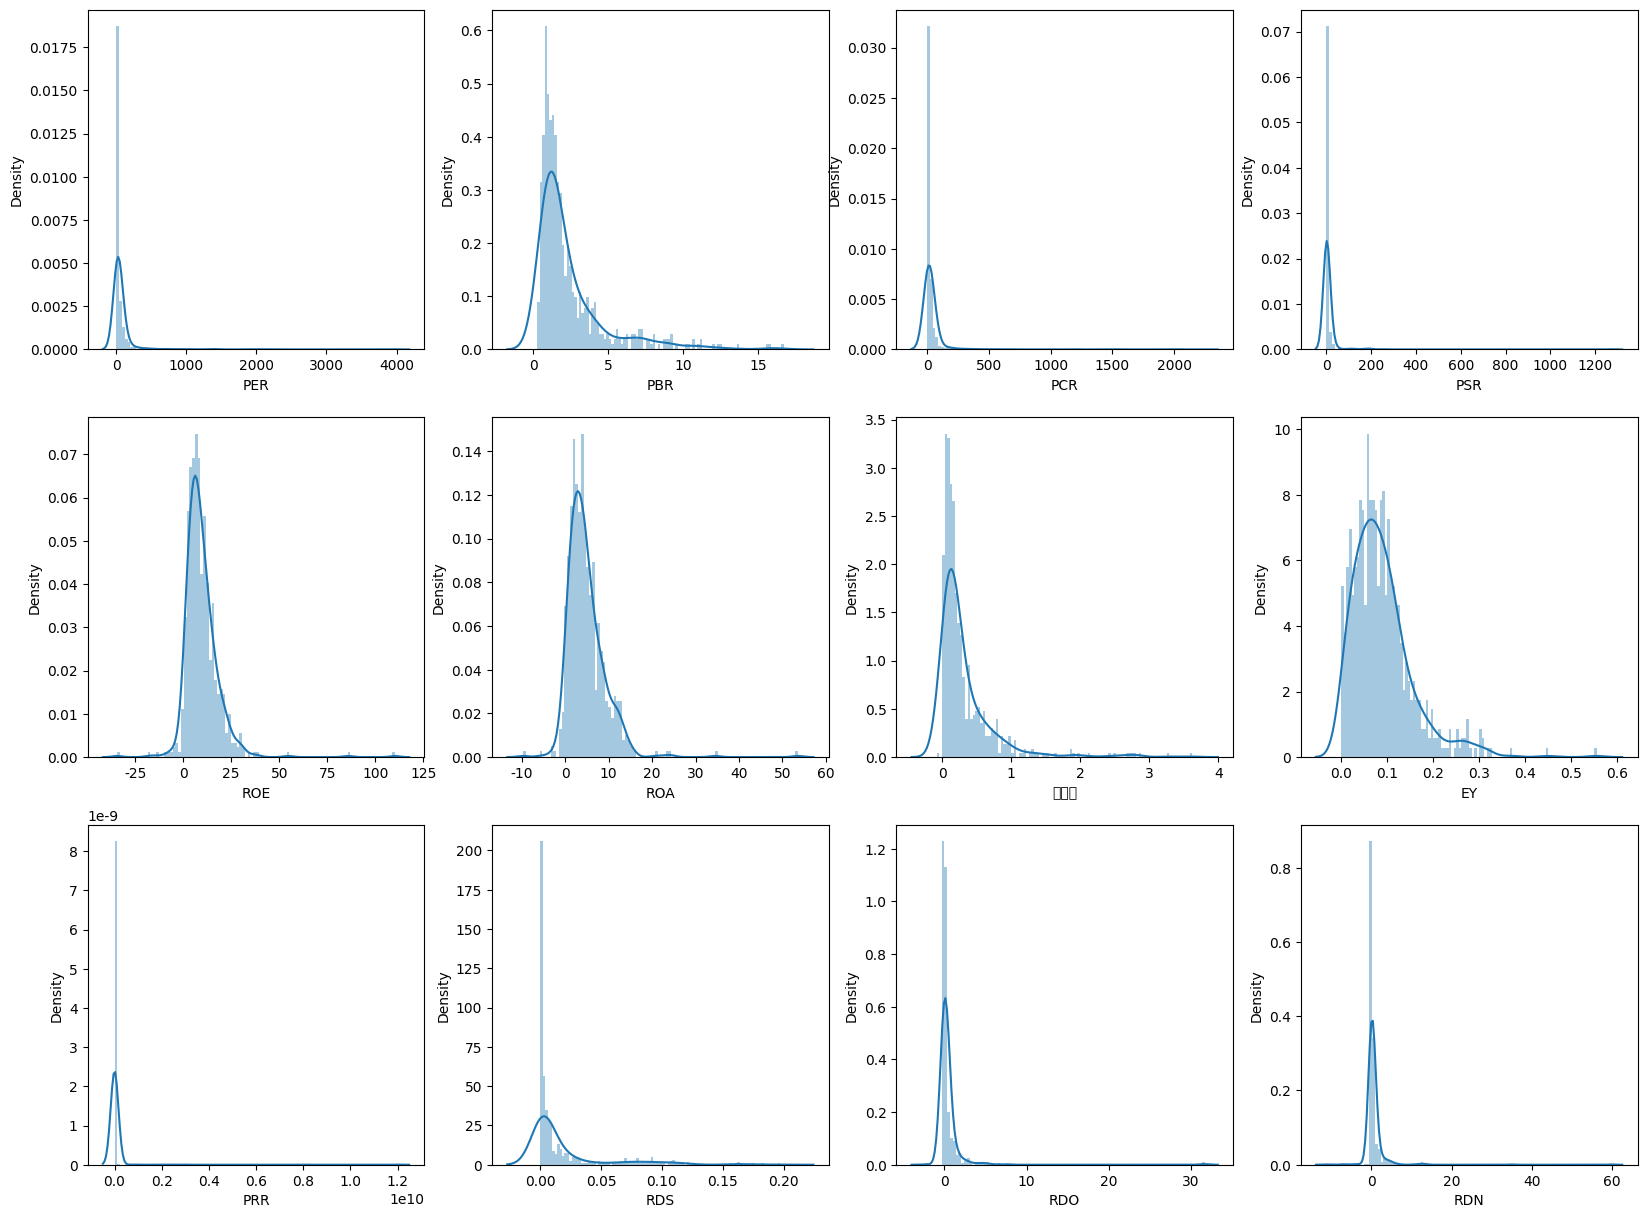

In [1004]:
# 윈저라이징 전 distplot

col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']].columns):
    sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_1180/3026044386.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kospi_f[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_1180/3026044386.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



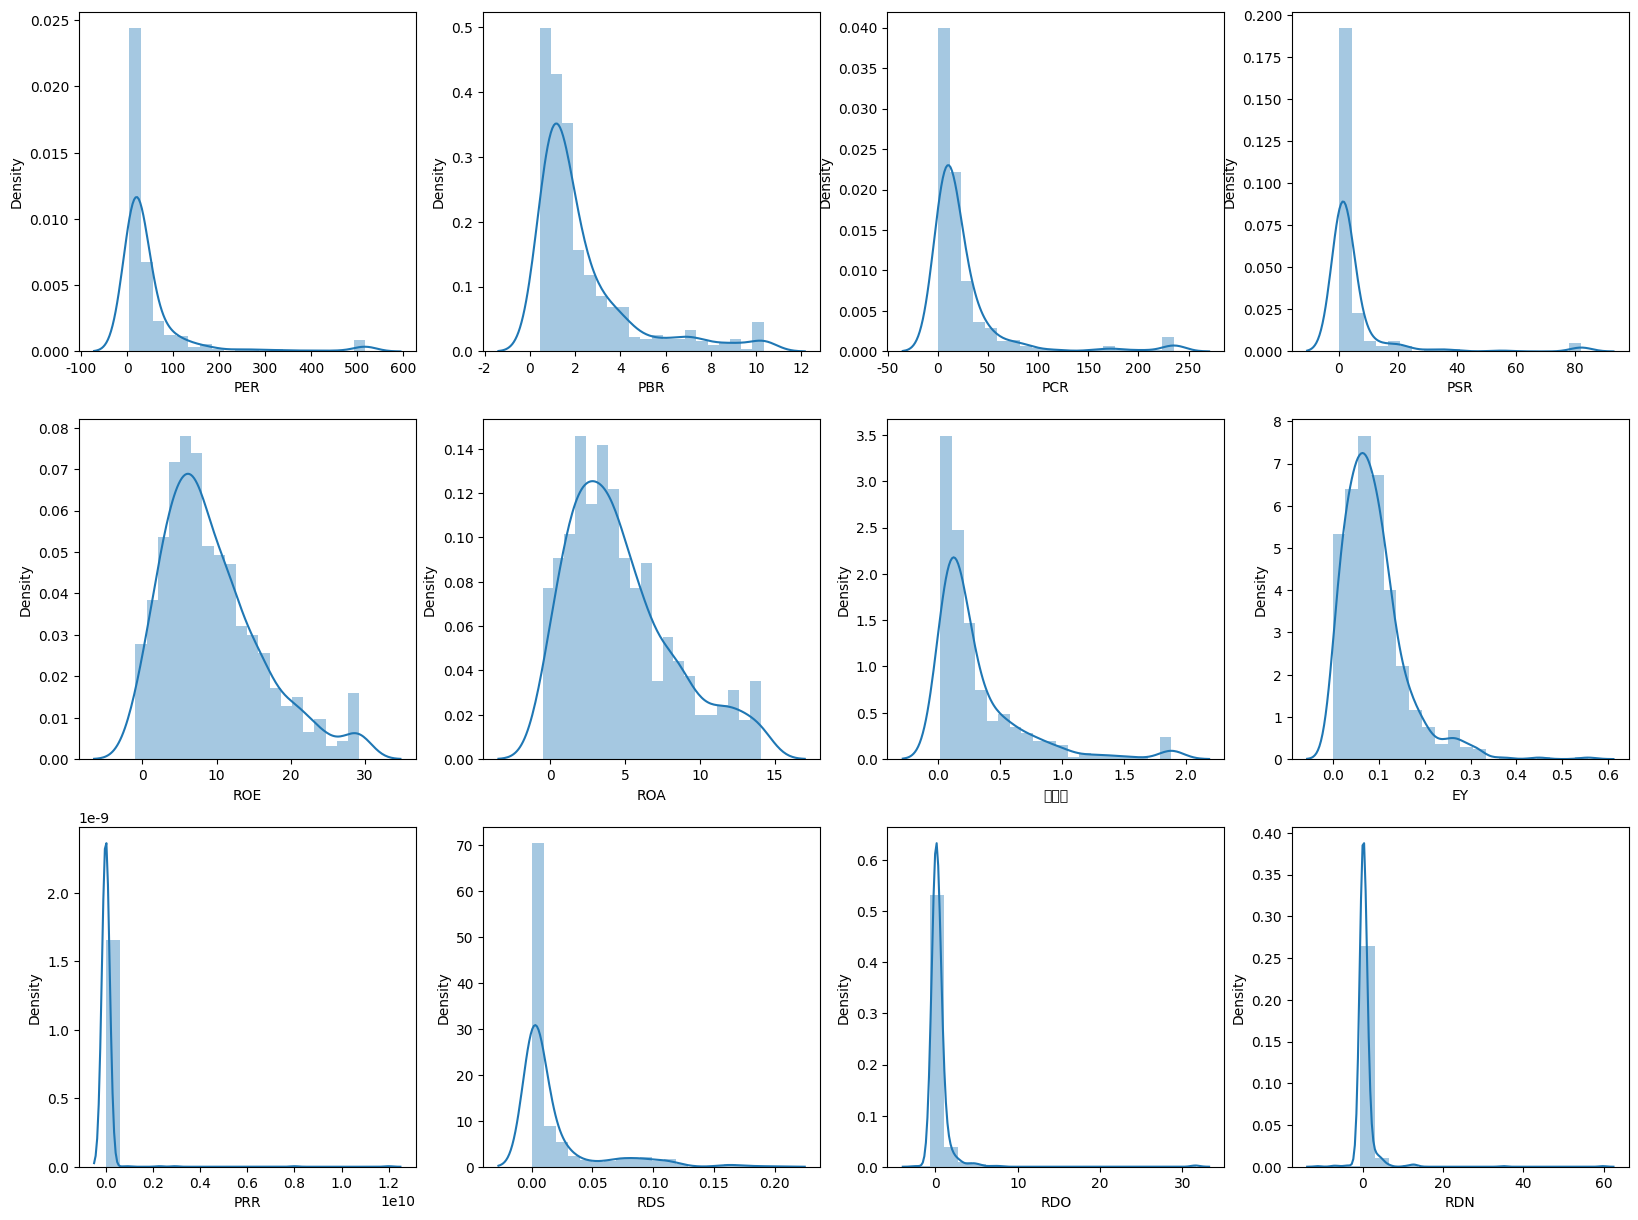

In [1005]:
col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(kospi_f.columns):
    sns.distplot(kospi_f[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

In [1006]:
kospi_f_col = kospi_f.columns

In [1007]:
kospi_f_col

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN'],
      dtype='object')

In [1008]:
kospi_f.isnull().sum()

PER    0
PBR    0
PCR    0
PSR    0
ROE    0
ROA    0
판관비    0
EY     0
PRR    0
RDS    0
RDO    0
RDN    0
dtype: int64

In [1009]:
kospi_f[kospi_f_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 0 to 741
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PER     620 non-null    float64
 1   PBR     620 non-null    float64
 2   PCR     620 non-null    float64
 3   PSR     620 non-null    float64
 4   ROE     620 non-null    float64
 5   ROA     620 non-null    float64
 6   판관비     620 non-null    float64
 7   EY      620 non-null    float64
 8   PRR     620 non-null    float64
 9   RDS     620 non-null    float64
 10  RDO     620 non-null    float64
 11  RDN     620 non-null    float64
dtypes: float64(12)
memory usage: 63.0 KB


In [1010]:
kospi_f_col

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN'],
      dtype='object')

In [1011]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# standard 스케일링
scaler = StandardScaler()
kospi_f[kospi_f_col] = scaler.fit_transform(kospi_f[kospi_f_col])

print(kospi_f.head())

        PER       PBR       PCR       PSR       ROE       ROA       판관비   
0 -0.476528 -0.080051 -0.540626 -0.327790  2.954541  1.191687 -0.388599  \
1 -0.453185 -0.187068 -0.509654 -0.312605  2.716734  1.791411 -0.277758   
2 -0.488008 -0.437535 -0.521328 -0.321337  1.149269  0.963411 -0.263716   
3 -0.488828 -0.407934 -0.482732 -0.317920  1.191069  1.376462 -0.592126   
4 -0.468710 -0.164299 -0.496670 -0.278438  2.037499  2.630060 -0.699292   

         EY       PRR       RDS       RDO       RDN  
0  2.352375 -0.072467  1.579039 -0.058245  0.004392  
1  2.699987 -0.072473  1.900746 -0.023191 -0.031714  
2  2.678366 -0.072474  1.865236  0.021510  0.004369  
3  1.458702 -0.072452  1.547951 -0.061648 -0.020832  
4  0.851606 -0.072425  1.366239 -0.092654 -0.076454  


/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_1180/289758497.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_f[kospi_f_col] = scaler.fit_transform(kospi_f[kospi_f_col])


In [1012]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN
0,-0.476528,-0.080051,-0.540626,-0.327790,2.954541,1.191687,-0.388599,2.352375,-0.072467,1.579039,-0.058245,0.004392
1,-0.453185,-0.187068,-0.509654,-0.312605,2.716734,1.791411,-0.277758,2.699987,-0.072473,1.900746,-0.023191,-0.031714
2,-0.488008,-0.437535,-0.521328,-0.321337,1.149269,0.963411,-0.263716,2.678366,-0.072474,1.865236,0.021510,0.004369
3,-0.488828,-0.407934,-0.482732,-0.317920,1.191069,1.376462,-0.592126,1.458702,-0.072452,1.547951,-0.061648,-0.020832
4,-0.468710,-0.164299,-0.496670,-0.278438,2.037499,2.630060,-0.699292,0.851606,-0.072425,1.366239,-0.092654,-0.076454
...,...,...,...,...,...,...,...,...,...,...,...,...
736,-0.450014,-0.838281,-0.519898,-0.364235,-0.754080,-0.713555,-0.471800,0.941219,-0.072489,-0.537261,-0.217866,-0.187812
737,-0.343962,-0.842835,-0.480112,-0.368031,-1.049659,-0.982222,-0.370734,1.023567,-0.072489,-0.537261,-0.217866,-0.187812
738,1.281159,-0.859321,-0.429127,-0.376004,-1.391516,-1.305841,-0.150278,0.507766,-0.072489,-0.537261,-0.217866,-0.187812
740,-0.454388,-0.496736,-0.518112,-0.347911,-1.403458,-1.246196,-0.130328,-0.847546,-0.072449,-0.182178,0.200250,1.107888


In [1013]:
kospi[['PER', "PBR", "PCR", "PSR", "ROA", "판관비", "EY", "ROE", 'PRR', 'RDS', 'RDO', 'RDN']] = kospi_f[['PER', "PBR", "PCR", "PSR", "ROA", "판관비", "EY", "ROE", 'PRR', 'RDS', 'RDO', 'RDN']]

In [1014]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2016,15900.0,2.954541,7.054485e+11,-0.476528,-0.080051,-0.540626,-0.327790,-0.072467,1.579039,-0.058245,0.004392,1.191687,-0.388599,2.352375,18100.0,20.782313
1,DB하이텍,000990,2017,12000.0,2.716734,5.324140e+11,-0.453185,-0.187068,-0.509654,-0.312605,-0.072473,1.900746,-0.023191,-0.031714,1.791411,-0.277758,2.699987,20350.0,1.243094
2,DB하이텍,000990,2018,10850.0,1.149269,4.817247e+11,-0.488008,-0.437535,-0.521328,-0.321337,-0.072474,1.865236,0.021510,0.004369,0.963411,-0.263716,2.678366,14150.0,-3.046683
3,DB하이텍,000990,2019,27600.0,1.191069,1.225401e+12,-0.488828,-0.407934,-0.482732,-0.317920,-0.072452,1.547951,-0.061648,-0.020832,1.376462,-0.592126,1.458702,13000.0,-0.812721
4,DB하이텍,000990,2020,51000.0,2.037499,2.264328e+12,-0.468710,-0.164299,-0.496670,-0.278438,-0.072425,1.366239,-0.092654,-0.076454,2.630060,-0.699292,0.851606,20900.0,6.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,현대제철,004020,2017,58600.0,-0.754080,7.819923e+12,-0.450014,-0.838281,-0.519898,-0.364235,-0.072489,-0.537261,-0.217866,-0.187812,-0.713555,-0.471800,0.941219,56600.0,0.347349
737,현대제철,004020,2018,45250.0,-1.049659,6.038422e+12,-0.343962,-0.842835,-0.480112,-0.368031,-0.072489,-0.537261,-0.217866,-0.187812,-0.982222,-0.370734,1.023567,50300.0,-1.113074
738,현대제철,004020,2019,31450.0,-1.391516,4.196870e+12,1.281159,-0.859321,-0.429127,-0.376004,-0.072489,-0.537261,-0.217866,-0.187812,-1.305841,-0.150278,0.507766,46700.0,-0.715706
740,효성첨단소재,298050,2020,149000.0,-1.403458,6.675123e+11,-0.454388,-0.496736,-0.518112,-0.347911,-0.072449,-0.182178,0.200250,1.107888,-1.246196,-0.130328,-0.847546,60900.0,-5.297297


In [1015]:
kospi.reset_index(drop=True)

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2016,15900.0,2.954541,7.054485e+11,-0.476528,-0.080051,-0.540626,-0.327790,-0.072467,1.579039,-0.058245,0.004392,1.191687,-0.388599,2.352375,18100.0,20.782313
1,DB하이텍,000990,2017,12000.0,2.716734,5.324140e+11,-0.453185,-0.187068,-0.509654,-0.312605,-0.072473,1.900746,-0.023191,-0.031714,1.791411,-0.277758,2.699987,20350.0,1.243094
2,DB하이텍,000990,2018,10850.0,1.149269,4.817247e+11,-0.488008,-0.437535,-0.521328,-0.321337,-0.072474,1.865236,0.021510,0.004369,0.963411,-0.263716,2.678366,14150.0,-3.046683
3,DB하이텍,000990,2019,27600.0,1.191069,1.225401e+12,-0.488828,-0.407934,-0.482732,-0.317920,-0.072452,1.547951,-0.061648,-0.020832,1.376462,-0.592126,1.458702,13000.0,-0.812721
4,DB하이텍,000990,2020,51000.0,2.037499,2.264328e+12,-0.468710,-0.164299,-0.496670,-0.278438,-0.072425,1.366239,-0.092654,-0.076454,2.630060,-0.699292,0.851606,20900.0,6.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,현대제철,004020,2017,58600.0,-0.754080,7.819923e+12,-0.450014,-0.838281,-0.519898,-0.364235,-0.072489,-0.537261,-0.217866,-0.187812,-0.713555,-0.471800,0.941219,56600.0,0.347349
616,현대제철,004020,2018,45250.0,-1.049659,6.038422e+12,-0.343962,-0.842835,-0.480112,-0.368031,-0.072489,-0.537261,-0.217866,-0.187812,-0.982222,-0.370734,1.023567,50300.0,-1.113074
617,현대제철,004020,2019,31450.0,-1.391516,4.196870e+12,1.281159,-0.859321,-0.429127,-0.376004,-0.072489,-0.537261,-0.217866,-0.187812,-1.305841,-0.150278,0.507766,46700.0,-0.715706
618,효성첨단소재,298050,2020,149000.0,-1.403458,6.675123e+11,-0.454388,-0.496736,-0.518112,-0.347911,-0.072449,-0.182178,0.200250,1.107888,-1.246196,-0.130328,-0.847546,60900.0,-5.297297


In [1016]:
kospi.to_csv('./kospi(최종).csv', index=False)